# Grades of Students dataset
Problem Statement:
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

Columns Description    --  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

-

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

 

·       All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam



 

Predict   CGPA of a student based on different grades in four years.

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,RepeatedStratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, classification_report
from sklearn import metrics,model_selection
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix,mean_squared_error
from sklearn.preprocessing import scale
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn.linear_model import LinearRegression
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv")
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [3]:
df.shape

(571, 43)

In [4]:
# manually replace the grades, label encoders.
#Serial number is not required for prediction.
#Linear regression.
#KNN regreesoor, Randm Forest, DT, SVR, 
#Used mode to replace null values
#First fill null values, mode values
#Then encode manuallly a=0,b=1.
#Data describe,
#Graph hist 
#Grade plotting
#Heatmapplot
#Highest correlation drop
#Model Training
#KNN regreesoor, Randm Forest foers, DT, SVR, linear regression.
#Hypertunning
#Test prediction- One time sufficent, Highest accuracy model.

In [5]:
df.isna().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [6]:
df['PH-121'].value_counts()

A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64

In [7]:
df['CS-412'].value_counts()

A-    157
B+     80
A      77
B      65
B-     37
C+     24
C      19
D+      8
C-      7
F       6
D       5
A+      4
W       3
Name: CS-412, dtype: int64

In [8]:
#CGPA is only float datatype,reamining are the object datatype

In [9]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [10]:
#As all columns are in object datatype hence first we have to convert it into integer with the help of label encoding technique.

In [11]:
#First we have to treat null values present in dataset using mode method.
for i in df.columns:
    df[i]=df[i].fillna(df[i].mode()[0])

In [12]:
df.isna().sum().sum()

0

In [13]:
#We have successfully removed the all null values which are present in dataset.

In [14]:
#As serial number does not contribute for prediction of grades hence we need to delet this column

df=df.drop(columns=["Seat No."])

In [15]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [16]:
#We have deleted the Seat No. column. SO now we have 42 columns & 571 rows in dataset.
# We have also treted nulls with mode method.
#Now we have to encode the object dataset into int. using label encoders.

In [17]:
#Checking Duplicate values

In [18]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [19]:
#There is no duplicate values are present in dataset

Lets encode the object dataset using label encoding techniques

In [20]:
df

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,A,B+,D,A,D,D+,B-,C-,B-,C-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [21]:
df.shape

(571, 42)

In [22]:
df2=df.copy()

In [23]:
df2.select_dtypes(include='object').head(10)

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C,C-,C-,C-,C-,A-,A,C-,B,A-
1,A,D,D+,D,B-,C,D,A,D+,D,...,D,D+,D,C,D,A-,B-,C,C,B
2,A,B,A,B-,B+,A,B-,B+,A-,A-,...,A-,B,B,A,C,A,A,A,A-,A
3,D,C+,D+,D,D,A-,D+,C-,D,C+,...,C-,D+,C,D+,C-,B-,B,C+,C+,C+
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,A-,B-,B+,B+,B-,A-,A,A-,A-,A
5,A,B-,B,D+,C+,A-,C+,B,B+,B+,...,B+,C,B-,C+,C+,A-,A-,B+,B-,B
6,B-,C-,A-,D,A-,B,A,B+,A-,B+,...,C+,B-,C,B+,B-,A,A-,B+,B+,A
7,B+,B+,C+,C,C,A-,C-,A-,B,A-,...,B+,D+,B+,B+,C,A,B+,A-,A-,A-
8,A-,C,A-,D+,B,A-,A-,A-,B+,A-,...,A-,B+,B,B-,C+,A,A-,B+,A-,A
9,A,B,C+,B,B,A-,C,B-,A-,A,...,A-,C+,B-,B+,B-,A,A,A-,B,A


In [24]:
df2.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder
lab_enc= LabelEncoder()

In [28]:
cols=['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412']

df[cols] = df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df.head()


,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5,10,8,6,8,10,9,8,5,8,...,8,8,8,8,2,0,8,3,2,2.205
1,0,9,10,9,5,6,9,0,10,9,...,10,9,6,9,2,5,6,6,3,2.008
2,0,3,0,5,4,0,5,4,2,2,...,3,3,0,6,0,0,0,2,0,3.608
3,9,7,10,9,9,2,10,8,9,7,...,10,6,10,8,5,3,7,7,7,1.906
4,2,2,2,4,0,0,2,4,0,2,...,5,4,4,5,2,0,2,2,0,3.448


In [29]:
df["PH-121"].value_counts()

2     112
0     111
4      61
3      57
5      56
9      44
6      33
7      31
10     22
1      22
8      19
12      2
11      1
Name: PH-121, dtype: int64

In [30]:
#We have successfully encode the data using label encoding techniques

In [31]:
# Describe the datset
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,2.898424,4.241681,3.896673,2.838879,4.122592,3.959720,3.886165,4.779335,...,4.071804,4.835377,3.432574,5.385289,2.984238,2.397548,3.856392,3.966725,3.049037,2.954888
std,3.046895,2.785317,2.964737,3.200507,2.988546,2.696709,2.727192,3.031436,2.657528,3.146202,...,3.362345,2.740382,2.980685,2.729063,2.468346,2.499388,2.382769,2.795475,2.332316,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,0.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.000000,3.000000,5.000000,...,3.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.000000,3.029000
75%,6.000000,7.000000,4.500000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.451000
max,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.000000,12.000000,...,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


In [32]:
#In this dataset we have encoded data from 0 values which starts with A grade student then folloWed by A+, B, B+ etc.
#Lowest grade is 13.
#No null values or missing data observed in dataset

# EDA

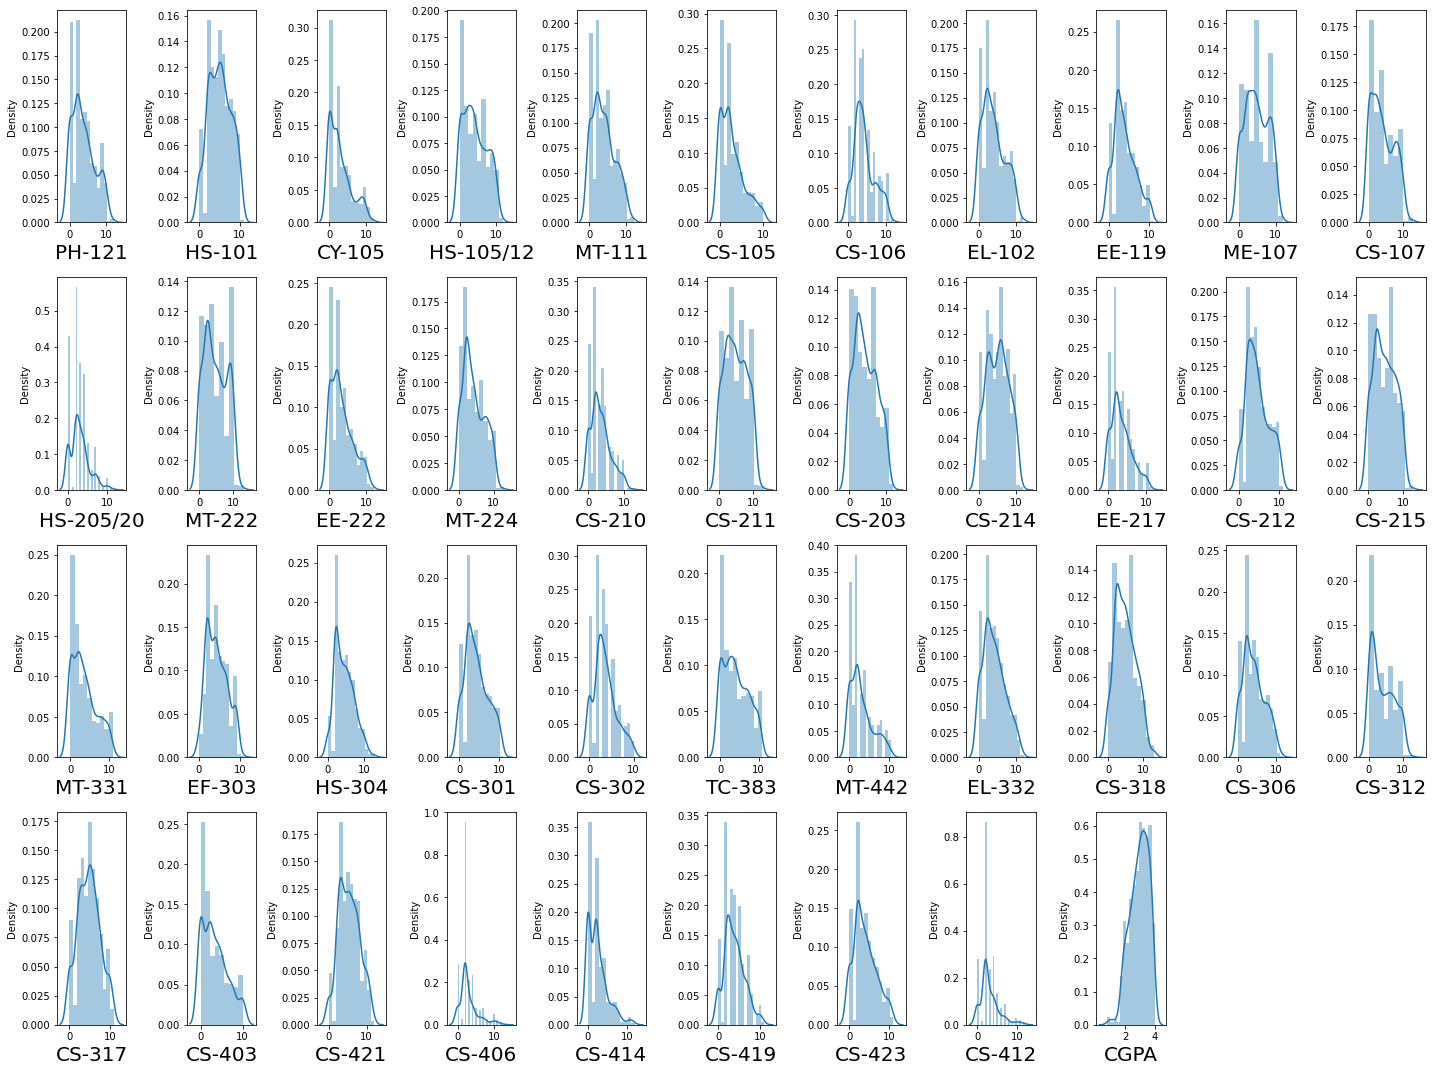

In [33]:
#Lets check data destribution, visualize the dataset

plt.figure(figsize=(20,15))
plotnumber=1

for column in df:
    if plotnumber<=42:
        ax=plt.subplot(4,11, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
    
plt.tight_layout()

In [34]:
# It is observed that the dataset is skewness in some columns for this we will plot box plot to find using box plot

In [35]:
df_feature=df.drop("CGPA",axis=1)

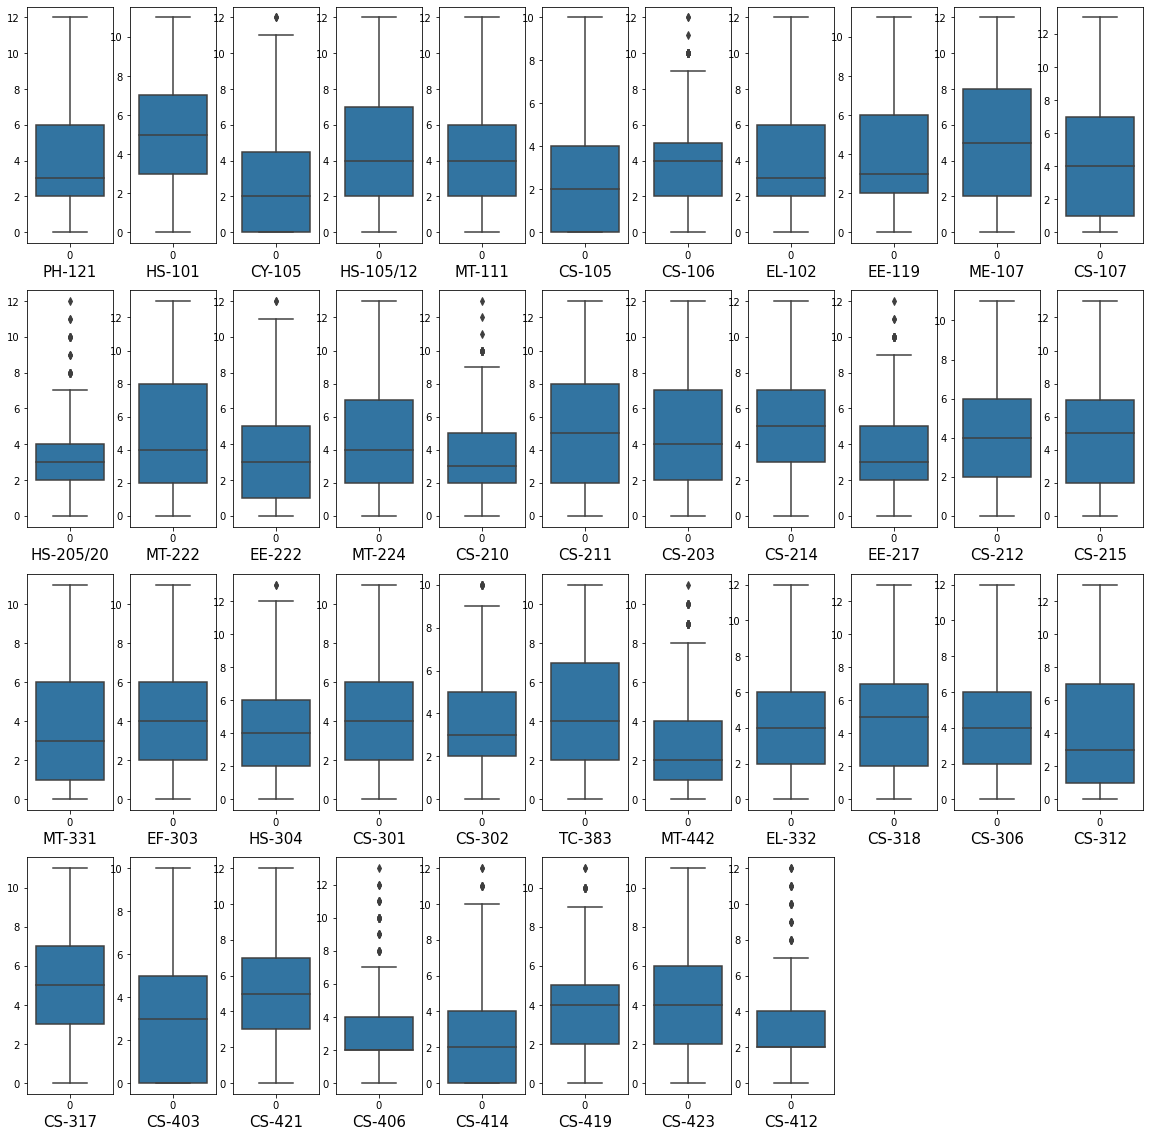

In [36]:
#Finding the outliers using boxplot

plt.figure(figsize=(20,20))
graph=1

for column in df_feature:
    if graph<=42:
        plt.subplot(4,11, graph)
        ax=sns.boxplot(data=df_feature[column])
        plt.xlabel(column, fontsize=15)
        
    graph+=1
    
plt.show()

In [37]:
#Outliers are observed in CS-406, CS-414,CS-419, CS-412, CY-105,CS-106,HS-205/20,EE-222,CS-210,EE-217,HS-304,CS-302,MT-442.
#We have to treat this outliers .

In [38]:
#quantile 1
q1=df.quantile(0.25)

#3rd quantile
q3=df.quantile(0.75)

#IQR
IQR=q3-q1

Removal of the Outliers for continuous variables.

In [39]:
def remove_outlier(df):
    sorted(df)
    Q1,Q3=np.percentile(df,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [53]:
for column in df:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

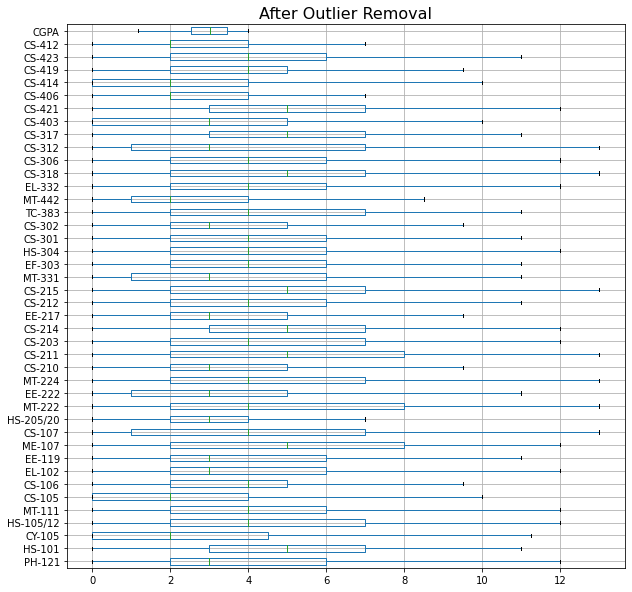

Shape After Outliers Treatment (571, 41)


In [54]:
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

print('Shape After Outliers Treatment',df_feature.shape)

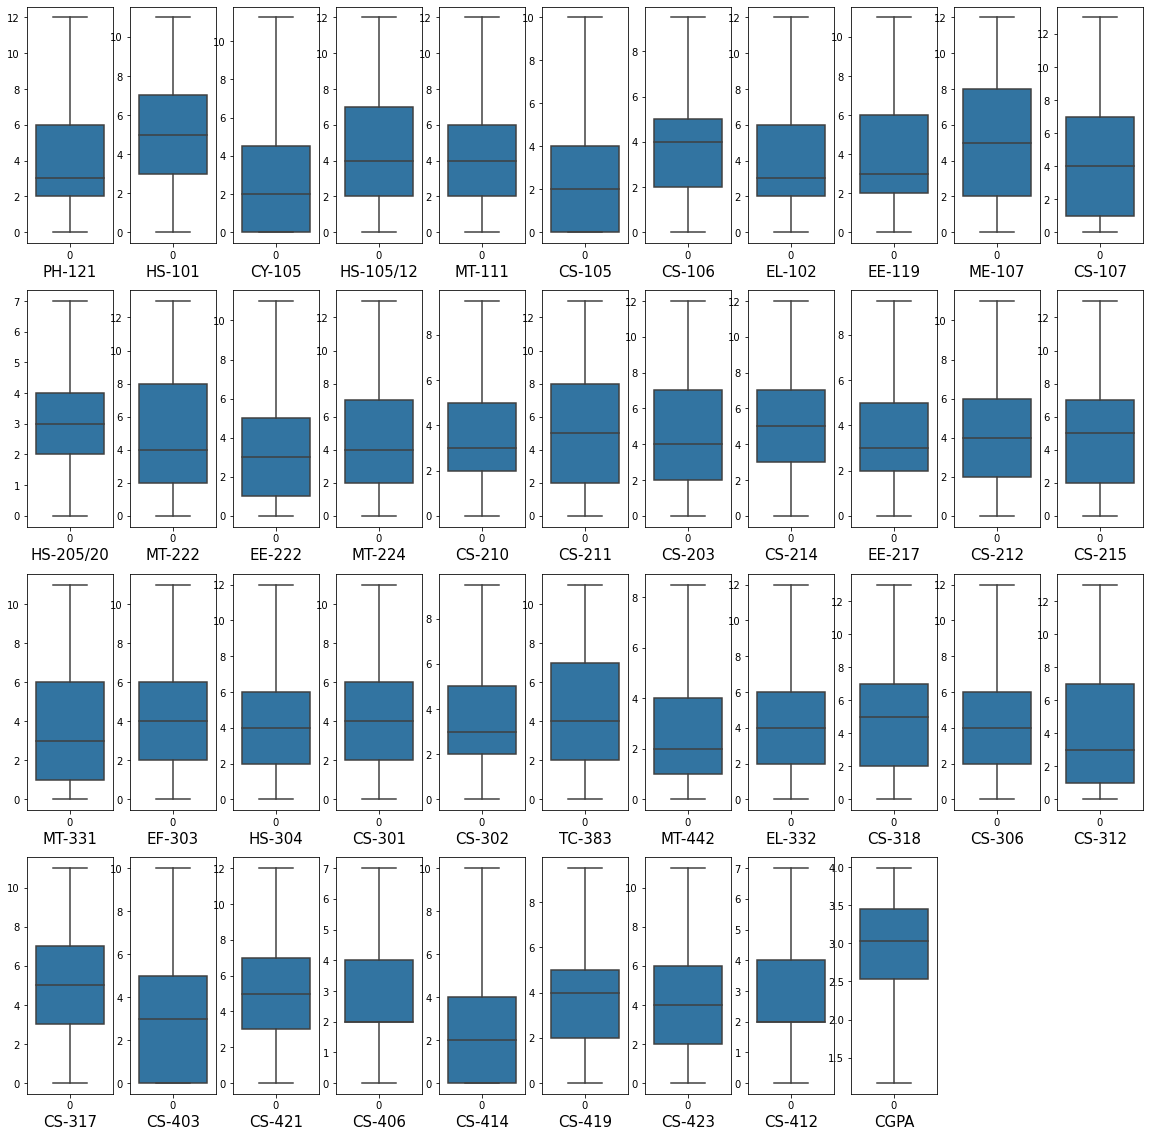

In [56]:
#Finding the outliers using boxplot

plt.figure(figsize=(20,20))
graph=1

for column in df:
    if graph<=42:
        plt.subplot(4,11, graph)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=15)
        
    graph+=1
    
plt.show()

In [44]:
#We have successfully removed all outliers from the dataset

In [45]:
#Finding the correlation using heatmap

<AxesSubplot:>

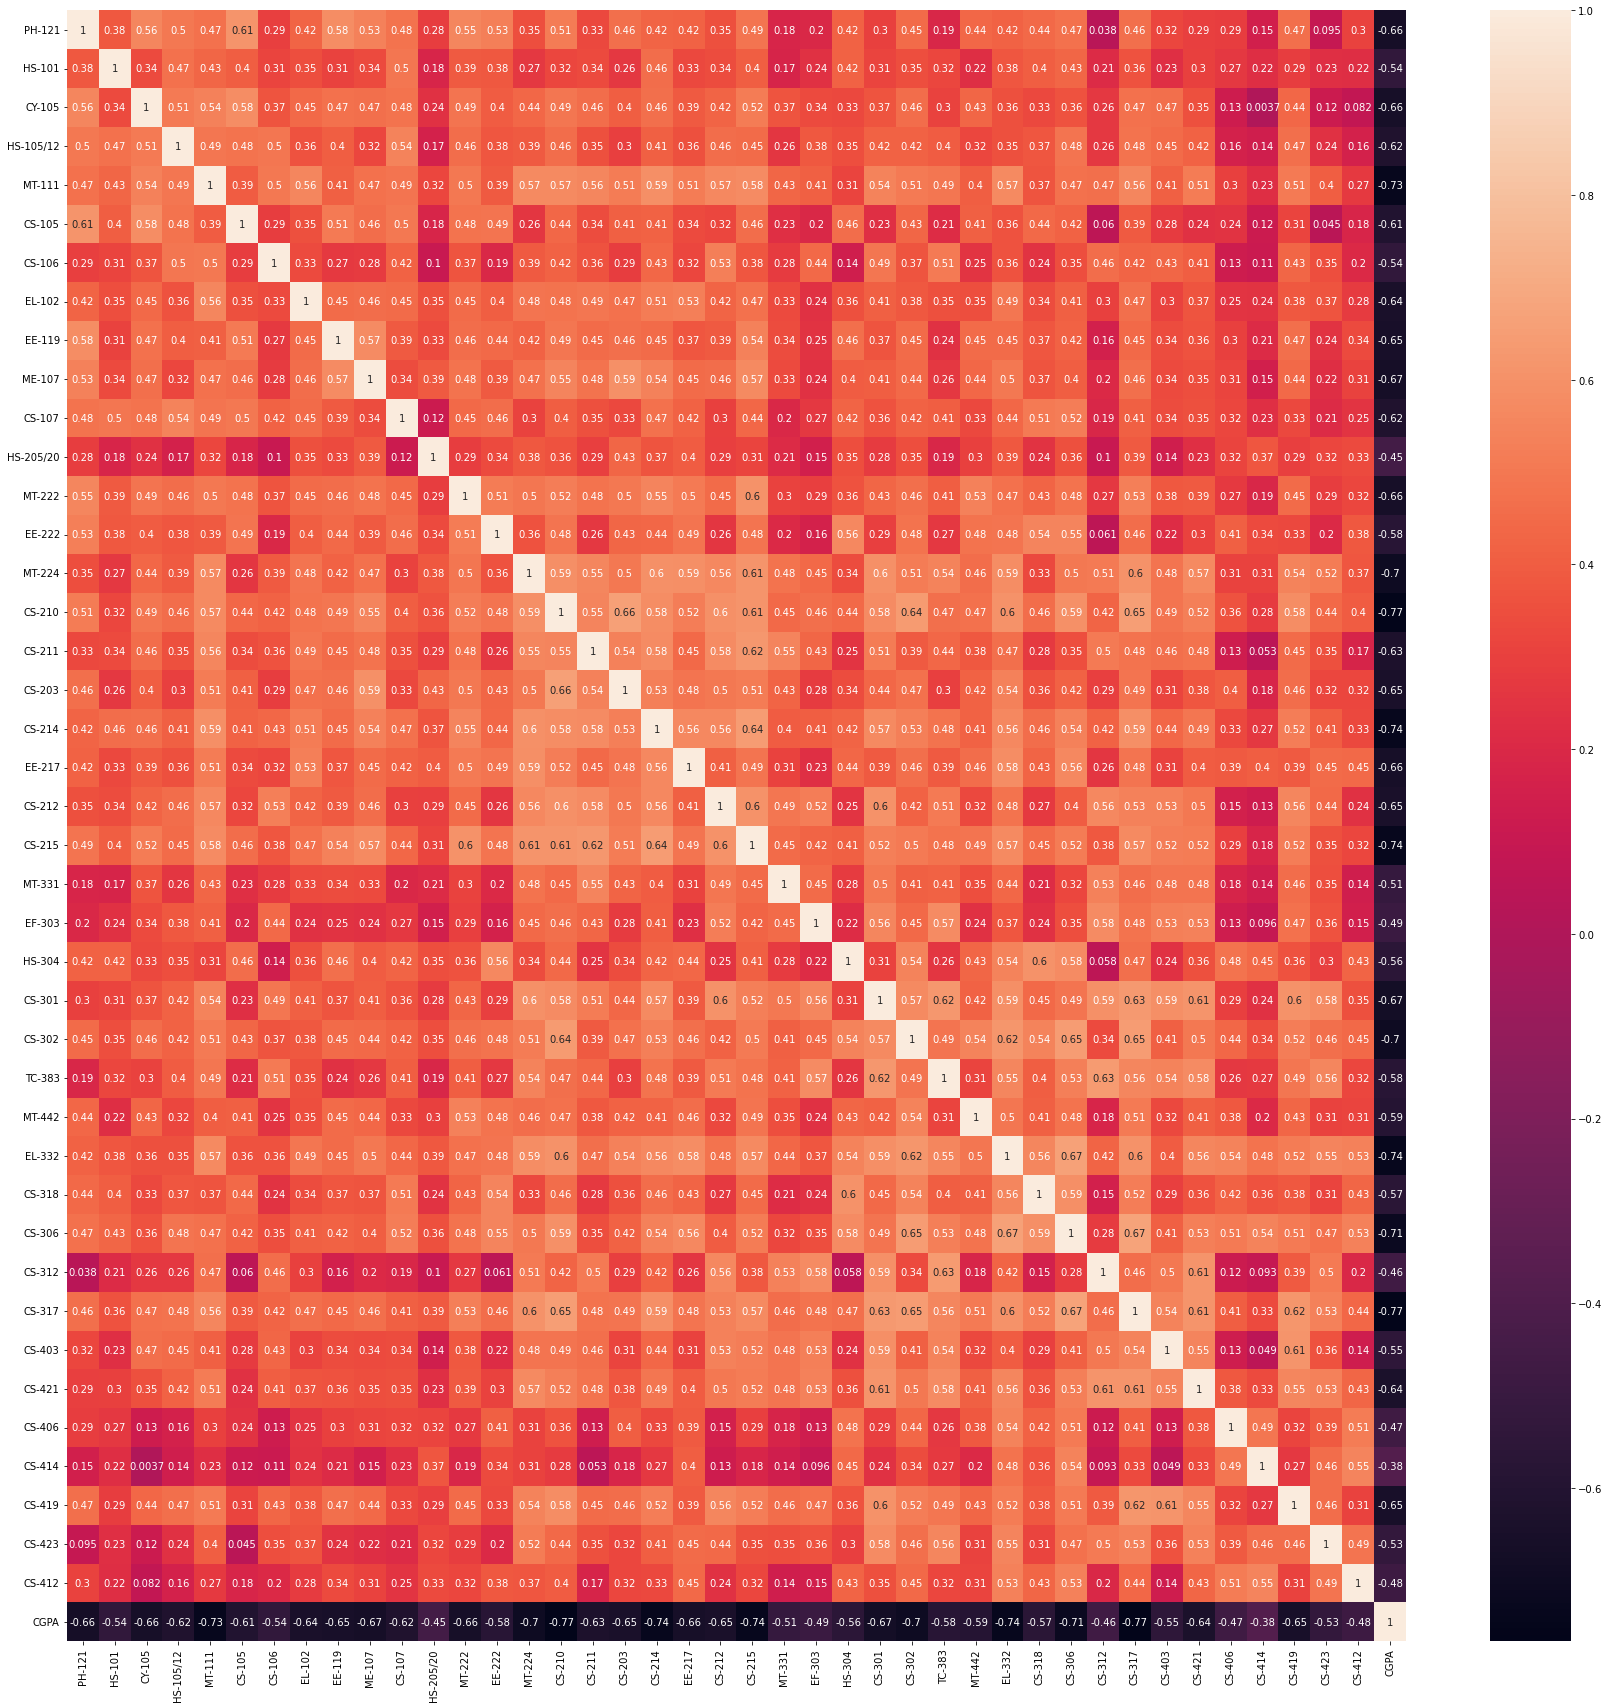

In [58]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True)

In [59]:
#Highest 66% correlation observed in heatmap.
# SO we can move forword for building the block.


In [60]:
x=df.drop(columns=["CGPA"],axis=1)
y=df["CGPA"]

In [63]:
#Scaling of dataset
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [64]:
#Finding the shape of X
x_scaled.shape

(571, 41)

In [65]:
#Having 571 rows & 41 columns

In [66]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y, test_size=0.25, random_state=1)

In [67]:
lr= LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [68]:
df.tail(5)

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,9.0,3.0,3.0,8.0,7.0,6.0,3.0,5.0,6.0,2.193
570,6.0,9.0,9.0,6.0,6.0,10.0,3.0,7.0,6.0,10.0,...,7.0,6.0,5.0,9.0,7.0,8.0,4.0,9.0,7.0,1.753


In [69]:
#Checking training score

lr.score(x_train, y_train)

0.9313516443044341

In [70]:
# WE got 93 % training score

In [71]:
#Checking testing score

lr.score(x_test, y_test)

0.9524238989672765

In [72]:
#Testing score 95% 

In [73]:
#plot to  visualize data
y_pred=lr.predict(x_test)
y_pred

array([3.56044245, 2.4860339 , 2.65890907, 2.86158137, 2.63440664,
       3.08892979, 3.01207234, 3.18537799, 2.9933844 , 1.68198551,
       2.25567966, 1.97215218, 3.9990534 , 3.39750502, 2.53204738,
       3.92243411, 2.76683399, 2.92234148, 2.4580689 , 2.71408517,
       3.44889577, 3.62433457, 2.70247144, 3.86527712, 3.48384526,
       3.25647702, 3.39632661, 1.92179319, 2.46990128, 1.82989142,
       3.18650662, 2.60607927, 3.99948904, 1.81678913, 2.47986795,
       2.26532258, 2.30626497, 3.37532325, 3.0499954 , 3.80336546,
       2.88517673, 3.83640394, 2.01697914, 2.2733958 , 3.67852262,
       2.81745353, 3.8021534 , 3.04348348, 2.76857646, 3.1248112 ,
       2.75041465, 2.39274663, 2.2106888 , 2.12236836, 2.82159921,
       3.61281343, 2.86996878, 3.59646643, 2.76352673, 3.57272406,
       3.29311732, 3.45772358, 3.23350092, 3.24395204, 3.03329732,
       3.6891246 , 3.64648598, 3.89377226, 1.85368749, 2.43492018,
       2.32662016, 3.19921855, 3.51249105, 3.56624743, 3.14136

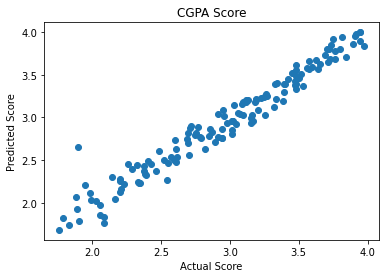

In [74]:
#Plotting the graph of Acutal score Vs Predicted score

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("CGPA Score")
plt.show()

In [75]:
#From that we got vety good accuracy score around 95% & Actual score & predicted score is almost linear.

In [76]:
#Finding the Mean squared error, mean absolute error & root means square error

In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [78]:
y_pred= lr.predict(x_test)

In [79]:
#Mean square error
mean_absolute_error(y_test, y_pred)

0.09422331936090855

In [80]:
#MSE
mean_absolute_error(y_test, y_pred)

0.09422331936090855

In [81]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

0.12774352010534168

In [113]:
r2_score(y_test, y_pred)

0.9433966149148769

In [ ]:
#We got 94% r2 score

# Random Forest

In [97]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [101]:
y_pred

array([3.54895 , 2.49    , 2.2903  , 2.856   , 2.7347  , 3.11305 ,
       2.9054  , 3.1511  , 3.3113  , 1.96225 , 2.2482  , 2.1148  ,
       3.9079  , 3.38485 , 2.59965 , 3.7726  , 2.6928  , 2.8283  ,
       2.27555 , 2.8095  , 3.33495 , 3.58225 , 2.69785 , 3.83355 ,
       3.41825 , 3.36235 , 3.43875 , 1.9833  , 2.8051  , 1.9526  ,
       3.13395 , 2.44355 , 3.9084  , 2.05465 , 2.566175, 2.49705 ,
       2.27705 , 3.50755 , 3.22845 , 3.66295 , 2.7817  , 3.9115  ,
       2.0157  , 2.4247  , 3.5994  , 2.5919  , 3.7228  , 3.26875 ,
       2.59185 , 3.1206  , 2.7068  , 2.5751  , 2.25465 , 2.33555 ,
       2.7947  , 3.511   , 2.8459  , 3.44665 , 2.765625, 3.62505 ,
       3.2512  , 3.6266  , 3.1875  , 3.10185 , 3.369   , 3.6552  ,
       3.6105  , 3.8605  , 2.101   , 2.64    , 2.41575 , 3.2638  ,
       3.4293  , 3.4976  , 3.07485 , 3.30395 , 3.8184  , 3.69695 ,
       2.22605 , 2.6174  , 2.688125, 2.9614  , 3.29455 , 3.15795 ,
       3.1527  , 2.26125 , 3.1883  , 3.3753  , 2.93295 , 3.830

In [106]:
#Training accuracy score

regressor.score(x_train, y_train)

0.9833383844459488

In [105]:
#Testing accuracy score
regressor.score(x_test, y_test)

0.9433966149148769

In [107]:
#Mean square error
mean_absolute_error(y_test, y_pred)

0.10440367132867133

In [108]:
#MSE
mean_absolute_error(y_test, y_pred)

0.10440367132867133

In [109]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

0.13933674397356155

In [116]:
#R2 Score
r2_score(y_test, y_pred)

0.9433966149148769

In [ ]:
#Got 94% R2 score, which is very good score

# AdaboostRegressor

In [117]:
from sklearn.ensemble import AdaBoostRegressor

In [120]:
ada=AdaBoostRegressor()

In [121]:
ada.fit(x_train, y_train)

AdaBoostRegressor()

In [123]:
#Model Prediction on train data
y_pred=ada.predict(x_train)
y_pred

array([3.11160952, 3.49892222, 3.33212676, 2.04558025, 3.39485496,
       3.25013333, 3.08889815, 2.22083871, 2.97977124, 3.68425   ,
       3.04652632, 2.8191519 , 2.97977124, 2.9156    , 3.10930769,
       2.61474516, 2.87322314, 2.50111321, 3.43565289, 3.54661039,
       2.16172   , 2.80626829, 2.84011364, 3.43565289, 2.8560875 ,
       2.84011364, 2.18241026, 2.8758629 , 2.53530769, 3.19410204,
       2.81241414, 1.93970455, 3.18245455, 3.10164   , 2.30585401,
       3.34172368, 3.54661039, 2.8191519 , 3.25276923, 2.61474516,
       2.04488462, 3.32553846, 3.55619767, 2.90823478, 3.67346809,
       2.87561207, 3.46382482, 2.87322314, 2.24203448, 2.18710256,
       3.46382482, 2.96231863, 3.42595833, 3.62115625, 3.35606024,
       2.24203448, 2.77896   , 2.18710256, 3.68425   , 3.50811628,
       3.62365476, 3.43565289, 2.24203448, 2.90254286, 3.37736842,
       3.33212676, 2.38159302, 2.72804902, 2.72754839, 2.11484314,
       3.49892222, 2.80626829, 3.67346809, 1.93869863, 1.99730

In [124]:
accuracy=metrics.r2_score(y_train, y_pred)
print("R Square Score" , accuracy)

R Square Score 0.9364018526991175


#Predicting the data

In [137]:
#Model Prediction on test data
y_pred=ada.predict(x_test)


In [126]:
accuracy=metrics.r2_score(y_test, y_pred)
print("R Square Score" , accuracy)

R Square Score 0.9025200182330884


In [127]:
#We got 90% testing accuracy 

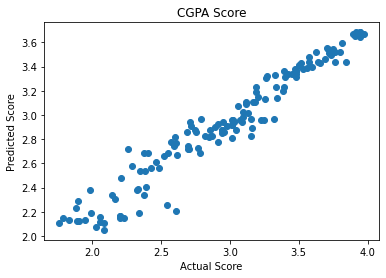

In [138]:
#Plotting the graph of Acutal score Vs Predicted score

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("CGPA Score")
plt.show()

# Using KNN Regressor

In [139]:
knn=KNeighborsRegressor()

knn.fit(x_train, y_train)

KNeighborsRegressor()

In [145]:
#Model Prediction on train data
y_pred=knn.predict(x_train)


In [146]:
accuracy=metrics.r2_score(y_train, y_pred)
print("R Square Score" , accuracy)

R Square Score 0.9328513835252442


In [ ]:
#Got training accuracy score:-93%

In [147]:
#Model Prediction on test data
y_pred=knn.predict(x_test)


In [148]:
accuracy=metrics.r2_score(y_test, y_pred)
print("R Square Score" , accuracy)

R Square Score 0.963224459727642


In [149]:
#Testing accuracy score:96% which is very good score

Conclusion- All models score are high.

In [162]:
#From the about model we can successfully able to predict the CGPA score of students